In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

color_pal = sns.color_palette()

plt.style.use('fivethirtyeight')


# Get the dataset

In [2]:
df = pd.read_csv('./Data/PJME_hourly.csv')

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'PMJE Energy Usage'}, xlabel='Datetime'>

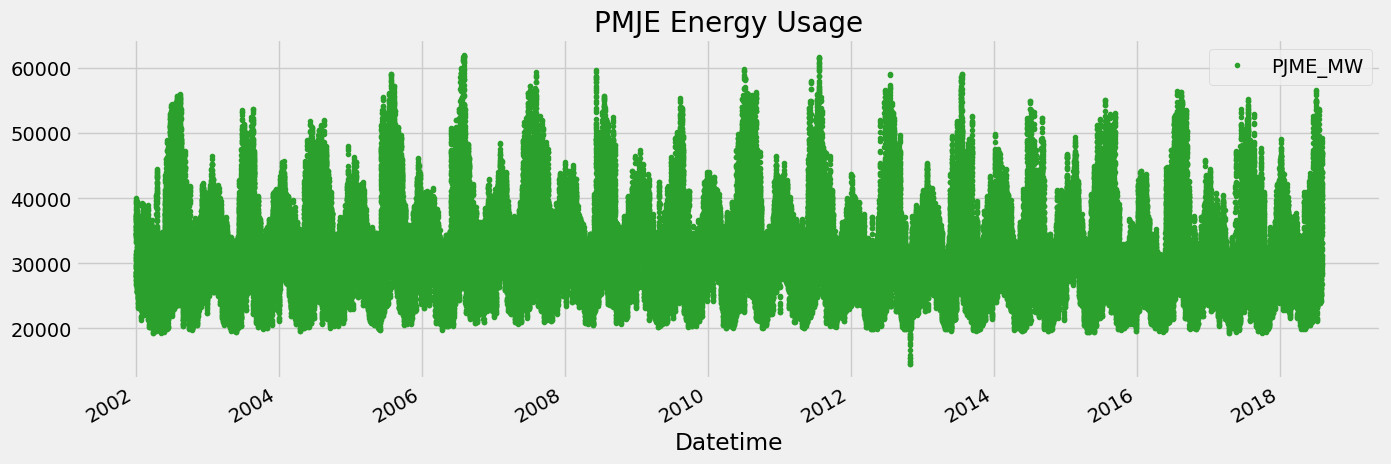

In [5]:
df.plot(style='.', figsize=(15,5), color=color_pal[2], title='PMJE Energy Usage')

# Test Train Split

In [6]:
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

print(train.shape)
print(test.shape)

(113926, 1)
(31440, 1)


In [7]:
train.head(50)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


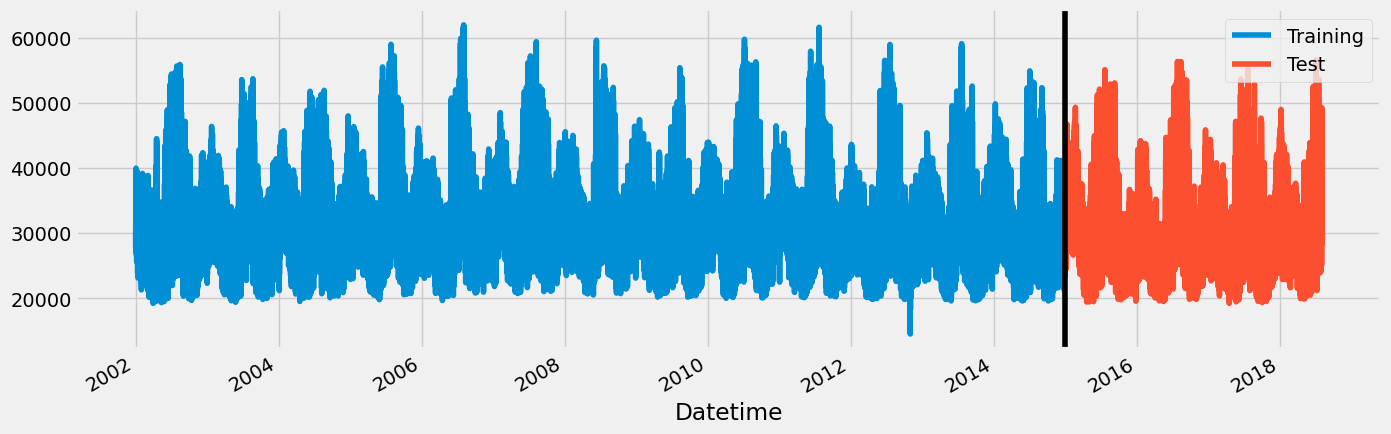

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training')
test.plot(ax=ax, label='Test')
ax.axvline('2015-01-01', color='black')
ax.legend(['Training', 'Test'])
plt.show()

<Axes: title={'center': 'One Week Data'}, xlabel='Datetime'>

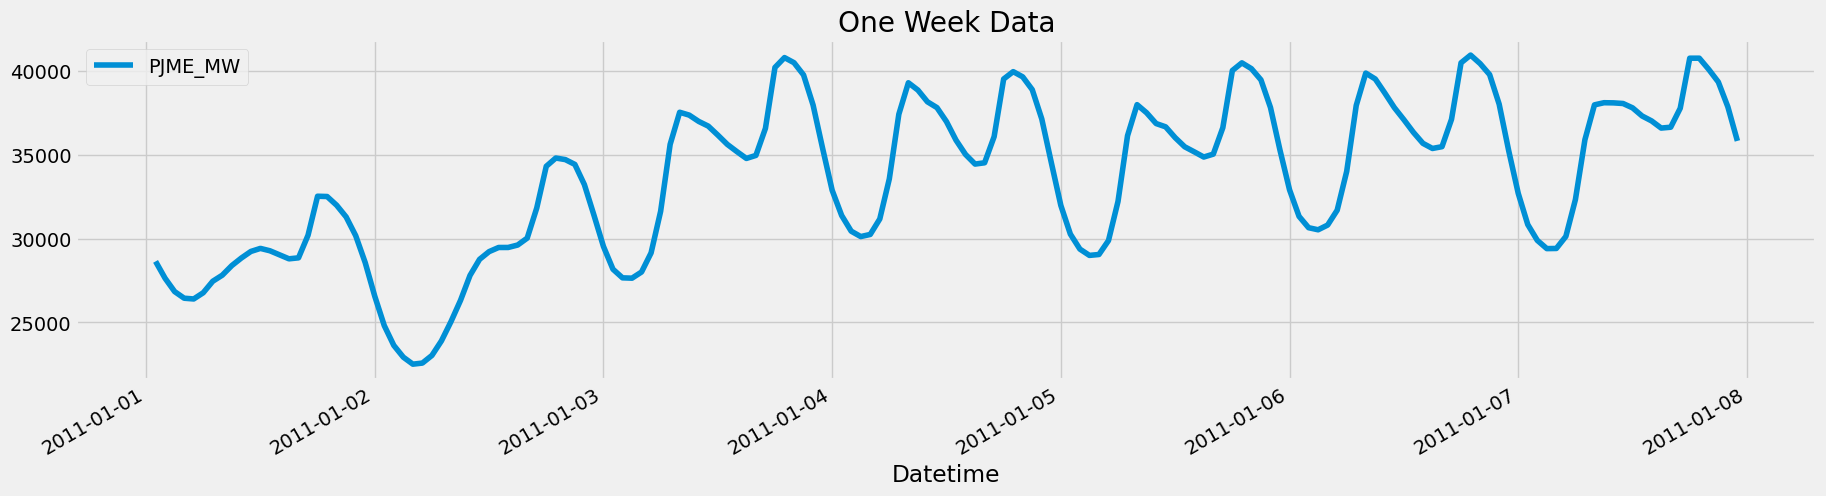

In [9]:
df.loc[(df.index > '2011-01-01') & (df.index < '2011-01-08')].plot(title='One Week Data', figsize=(20,5))

# Feature Creation

In [10]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['day_of_year'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    return df

In [11]:
df = create_features(df)

# Visualize feature - target

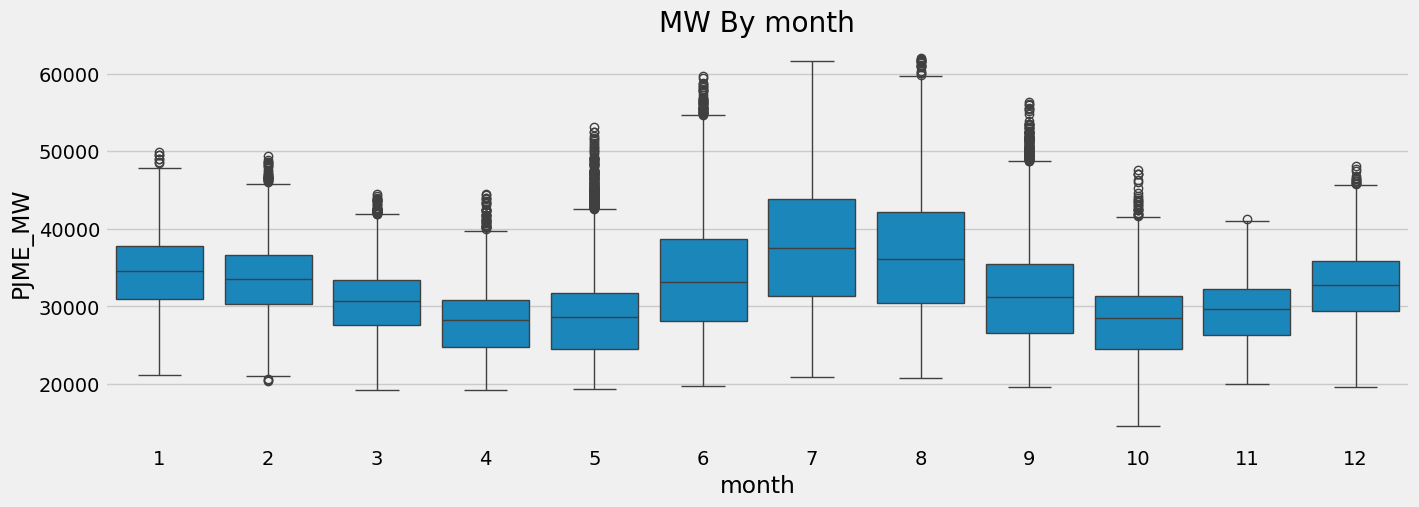

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW By month')
plt.show()

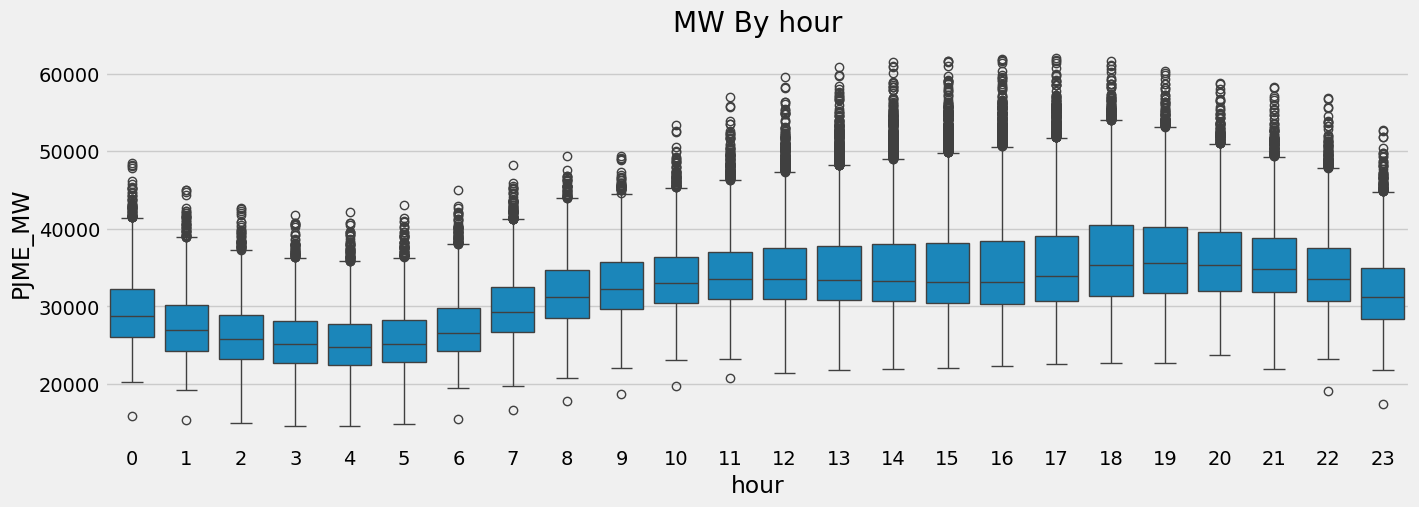

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW By hour')
plt.show()

# Create a model

In [14]:
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.003)

train = create_features(train)
test = create_features(test)

y_train = train['PJME_MW']
X_train = train.copy().drop('PJME_MW', axis=1)

y_test = test['PJME_MW']
X_test = test.copy().drop('PJME_MW', axis=1)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=50)

[0]	validation_0-rmse:6438.79199	validation_1-rmse:6509.14549
[50]	validation_0-rmse:5826.78013	validation_1-rmse:5951.13134
[100]	validation_0-rmse:5319.86752	validation_1-rmse:5499.39248
[150]	validation_0-rmse:4903.59165	validation_1-rmse:5134.29406
[200]	validation_0-rmse:4560.58700	validation_1-rmse:4843.51564
[250]	validation_0-rmse:4279.60256	validation_1-rmse:4610.39862
[300]	validation_0-rmse:4051.54734	validation_1-rmse:4423.71311
[350]	validation_0-rmse:3866.07500	validation_1-rmse:4277.47536
[400]	validation_0-rmse:3712.89253	validation_1-rmse:4170.36762
[450]	validation_0-rmse:3587.45498	validation_1-rmse:4082.93077
[500]	validation_0-rmse:3483.75307	validation_1-rmse:4016.70029
[550]	validation_0-rmse:3398.82085	validation_1-rmse:3960.21378
[600]	validation_0-rmse:3327.77835	validation_1-rmse:3913.67360
[650]	validation_0-rmse:3268.26652	validation_1-rmse:3878.44851
[700]	validation_0-rmse:3213.69133	validation_1-rmse:3845.63914
[750]	validation_0-rmse:3166.74156	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.003, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
reg.feature_importances_

array([0.45581672, 0.18525398, 0.12801625, 0.20950605, 0.021407  ,
       0.        ], dtype=float32)

In [16]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_)

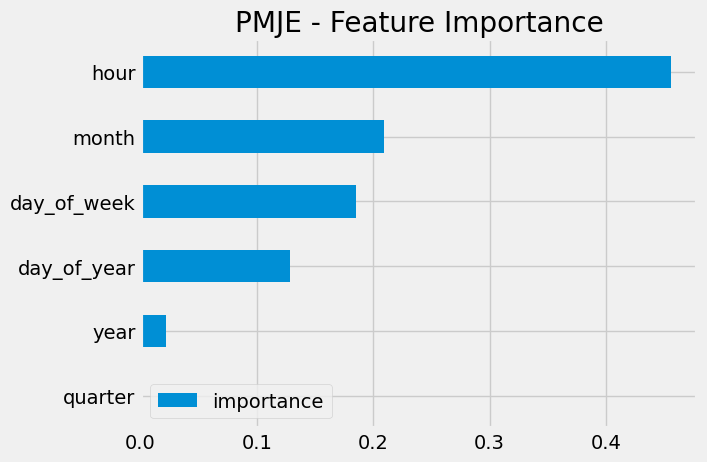

In [17]:
fi.columns = ['importance']

fi.sort_values('importance').plot(kind='barh', title='PMJE - Feature Importance')
plt.show()

# Forecast

In [18]:
test['prediction'] = reg.predict(X_test)

In [19]:
df = df.merge(test['prediction'], how='left', left_index=True, right_index=True)

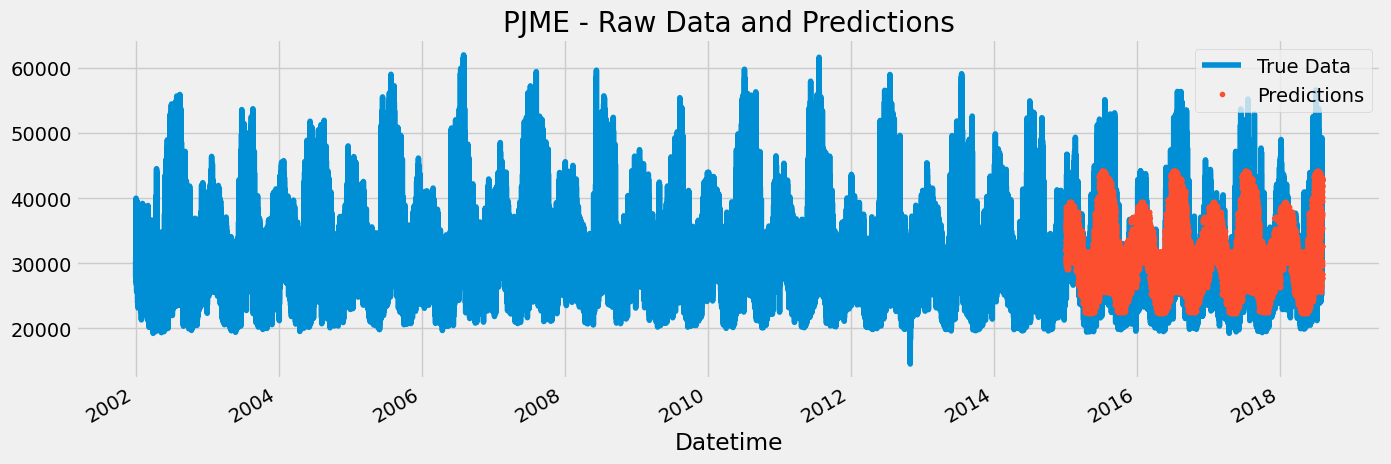

In [20]:
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
ax.set_title('PJME - Raw Data and Predictions')
plt.legend(['True Data', 'Predictions'])
plt.show()

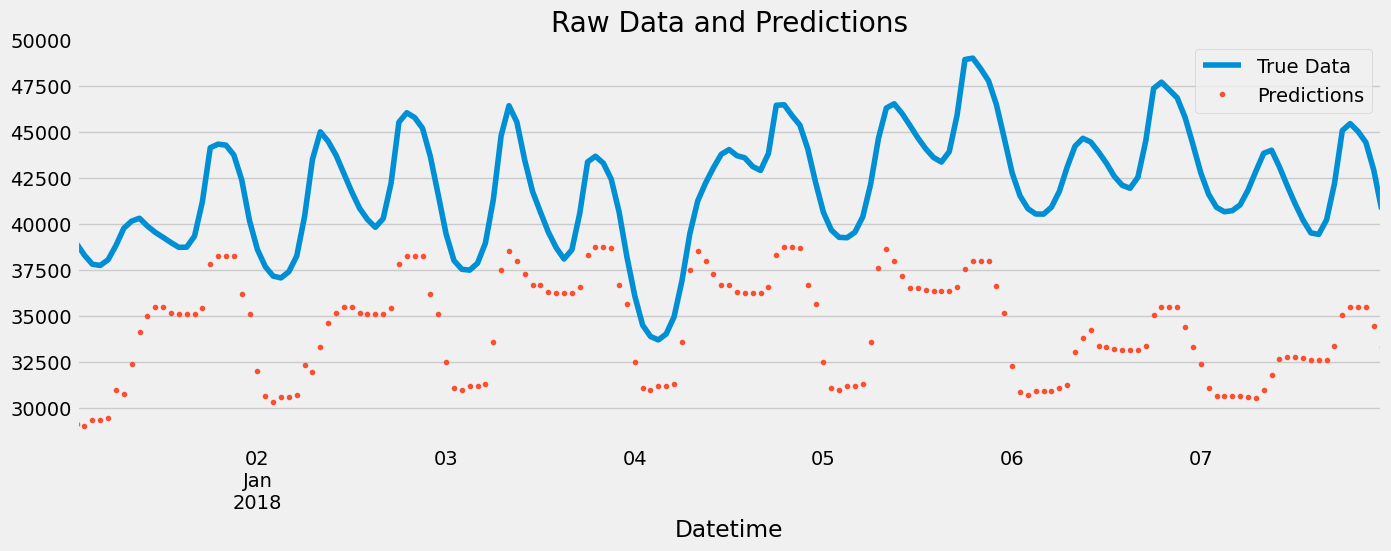

In [21]:
ax = df.loc[(df.index > '2018-01-01') & (df.index < '2018-01-08')]['PJME_MW'].plot(figsize=(15,5))
df.loc[(df.index > '2018-01-01') & (df.index < '2018-01-08')]['prediction'].plot(ax=ax, style='.')
ax.set_title('Raw Data and Predictions')
plt.legend(['True Data', 'Predictions'])
plt.show()

Model looks to be consistently low for this week

In [22]:
np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

3749.7580993723172

In [23]:
test['error'] = np.abs(test['PJME_MW'] - test['prediction'])

In [24]:
test['date'] = test.index.date
test.groupby('date')['error'].mean().sort_values(ascending=False).head()

date
2016-08-13    13262.657389
2016-08-14    12941.180013
2016-09-10    11232.717041
2016-09-09    11106.086914
2018-01-06    10577.848551
Name: error, dtype: float64

In [25]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head()

date
2016-12-30    337.856038
2016-01-12    507.559489
2016-12-12    508.639811
2017-04-01    511.704915
2016-06-03    544.767334
Name: error, dtype: float64